## TODOs
- make script out of this (but first make it pretty)
- plot design
    - better ordering of rows
    - better simple features name
    - title

In [23]:
import pandas as pd

bench = 'nb201'
df = pd.read_csv(f'./results/data/{bench}_all.csv', index_col=0)
df.head()

,cfg,dataset,data_seed,proxy,train_size,use_all_proxies,use_features,use_flops_params,use_onehot,use_path_encoding,tau,corr,fit_time,test_time
0,../zc_combine/configs/nb201_full.json,cifar100,42.0,NaN,1024,True,False,NaN,False,True,0.816692,0.953265,1.536391,0.125250
1,../zc_combine/configs/nb201_full.json,cifar100,43.0,NaN,1024,True,False,NaN,False,True,0.815188,0.952262,1.464424,0.125006
2,../zc_combine/configs/nb201_full.json,cifar100,44.0,NaN,1024,True,False,NaN,False,True,0.818214,0.953807,1.364597,0.182353
3,../zc_combine/configs/nb201_full.json,cifar100,45.0,NaN,1024,True,False,NaN,False,True,0.812614,0.950318,1.388543,0.145688
4,../zc_combine/configs/nb201_full.json,cifar100,46.0,NaN,1024,True,False,NaN,False,True,0.819397,0.954137,1.375816,0.111208


In [25]:
df['use_flops_params'].fillna(False, inplace=True)
df['use_path_encoding'].fillna(False, inplace=True)

In [26]:
def get_name(row):
    strset = [
        "ZCP" if row['use_all_proxies'] else None,
        "features" if row['use_features'] else None,
        "FP" if row['use_flops_params'] and not row['use_all_proxies'] else None,
        "onehot" if row['use_onehot'] else None,
        "path" if row['use_path_encoding'] else None
    ]
    
    if 'features' in row and row['features'] is not None:
        strset.pop(1)
        strset.append(row['features'].replace(',', ', '))
    
    return ' + '.join([s for s in strset if s is not None])

In [27]:
df.isna().any(axis=0)

cfg                  False
dataset              False
data_seed            False
proxy                 True
train_size           False
use_all_proxies      False
use_features         False
use_flops_params     False
use_onehot           False
use_path_encoding    False
tau                  False
corr                 False
fit_time             False
test_time            False
dtype: bool

In [28]:
df['name'] = [get_name(df.iloc[i]) for i in range(len(df))]
df.sort_values('name', inplace=True)
df['name'].unique()

array(['FP + onehot', 'FP + onehot + path', 'ZCP', 'ZCP + features',
       'ZCP + features + onehot', 'ZCP + features + onehot + path',
       'ZCP + features + path', 'ZCP + onehot', 'ZCP + onehot + path',
       'ZCP + path', 'features', 'features + FP',
       'features + FP + onehot', 'features + FP + onehot + path',
       'features + FP + path', 'features + onehot',
       'features + onehot + path', 'features + path', 'onehot',
       'onehot + path'], dtype=object)

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

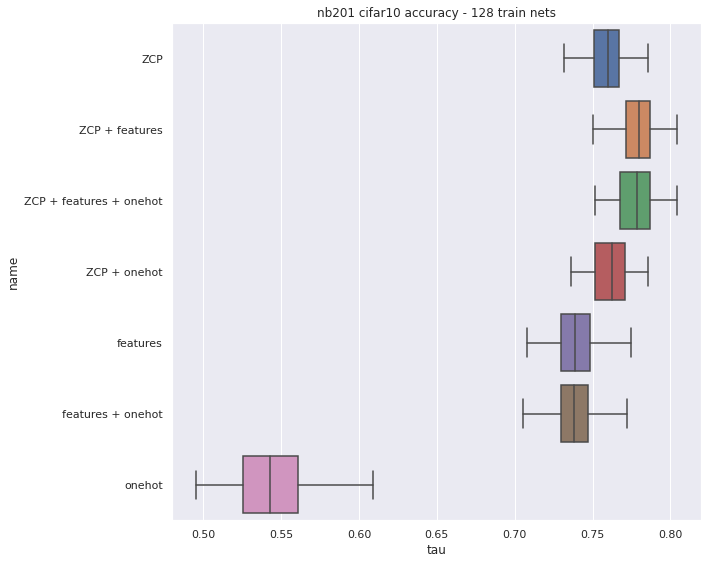

In [41]:
dataset = 'cifar10'
train_size = 128
metric = 'tau'

cond = ~(df['name'].str.contains('FP')) & ~(df['name'].str.contains('path'))
# cond = True
plotdf = df[(df['dataset'] == dataset) & (df['train_size'] == train_size) & cond]

plt.figure(figsize=(10, 8))
sns.boxplot(data=plotdf, x=metric, y='name')
plt.title(f'{bench} {dataset} accuracy - {train_size} train nets')
plt.tight_layout()
plt.savefig(f'./figs/{bench}-{dataset}-{train_size}.png')
plt.show()

In [37]:
plotdf

,cfg,dataset,data_seed,proxy,train_size,use_all_proxies,use_features,use_flops_params,use_onehot,use_path_encoding,tau,corr,fit_time,test_time,name
7502,../zc_combine/configs/nb201_full.json,cifar10,44.0,NaN,32,True,False,False,False,False,0.709292,0.892363,0.205671,0.069294,ZCP
7501,../zc_combine/configs/nb201_full.json,cifar10,43.0,NaN,32,True,False,False,False,False,0.727112,0.901495,0.180444,0.048878,ZCP
7500,../zc_combine/configs/nb201_full.json,cifar10,42.0,NaN,32,True,False,False,False,False,0.672828,0.859845,0.252868,0.070769,ZCP
7503,../zc_combine/configs/nb201_full.json,cifar10,45.0,NaN,32,True,False,False,False,False,0.668732,0.857107,0.112733,0.069957,ZCP
7504,../zc_combine/configs/nb201_full.json,cifar10,46.0,NaN,32,True,False,False,False,False,0.618804,0.811811,0.114198,0.055054,ZCP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8328,../zc_combine/configs/nb201_full.json,cifar10,70.0,NaN,32,False,False,False,True,False,0.335515,0.489528,0.195677,0.050756,onehot
8327,../zc_combine/configs/nb201_full.json,cifar10,69.0,NaN,32,False,False,False,True,False,0.413308,0.591522,0.208982,0.062434,onehot
8337,../zc_combine/configs/nb201_full.json,cifar10,79.0,NaN,32,False,False,False,True,False,0.394605,0.561738,0.129289,0.047769,onehot
8301,../zc_combine/configs/nb201_full.json,cifar10,43.0,NaN,32,False,False,False,True,False,0.420145,0.592770,0.203366,0.050458,onehot
